In [38]:
import networkx as nx

In [55]:
G=networkx.grid_graph(dim=[6,6])
print(G[0])
print(networkx.astar_path(G,(0,0),(5,5)))

KeyError: 0

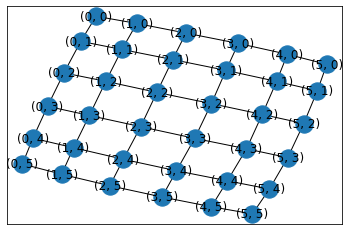

In [42]:
nx.draw_networkx(G)

In [81]:
from astar_python.astar import Astar
mat = [
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]
mat[5][5] = None
astar = Astar(mat)
result = astar.run([0, 0], [9, 9])
print(result)

[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 4], [6, 5], [7, 6], [8, 7], [9, 8], [9, 9]]


In [66]:
from astar import AStar
import sys
import math

def make_maze(w=30, h=30):
    """returns an ascii maze as a string"""
    from random import shuffle, randrange
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["|  "] * w + ['|'] for _ in range(h)] + [[]]
    hor = [["+--"] * w + ['+'] for _ in range(h + 1)]

    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]:
                continue
            if xx == x:
                hor[max(y, yy)][x] = "+  "
            if yy == y:
                ver[y][max(x, xx)] = "   "
            walk(xx, yy)

    walk(randrange(w), randrange(h))
    result = ''
    for (a, b) in zip(hor, ver):
        result = result + (''.join(a + ['\n'] + b)) + '\n'
    return result.strip()


def drawmaze(maze, set1=[], set2=[], c='#', c2='*'):
    """returns an ascii maze, drawing eventually one (or 2) sets of positions.
        useful to draw the solution found by the astar algorithm
    """
    set1 = list(set1)
    set2 = list(set2)
    lines = maze.strip().split('\n')
    width = len(lines[0])
    height = len(lines)
    result = ''
    for j in range(height):
        for i in range(width):
            if (i, j) in set1:
                result = result + c
            elif (i, j) in set2:
                result = result + c2
            else:
                result = result + lines[j][i]
        result = result + '\n'
    return result


class MazeSolver(AStar):

    """sample use of the astar algorithm. In this exemple we work on a maze made of ascii characters,
    and a 'node' is just a (x,y) tuple that represents a reachable position"""

    def __init__(self, maze):
        self.lines = maze.strip().split('\n')
        self.width = len(self.lines[0])
        self.height = len(self.lines)

    def heuristic_cost_estimate(self, n1, n2):
        """computes the 'direct' distance between two (x,y) tuples"""
        (x1, y1) = n1
        (x2, y2) = n2
        return math.hypot(x2 - x1, y2 - y1)

    def distance_between(self, n1, n2):
        """this method always returns 1, as two 'neighbors' are always adajcent"""
        return 1

    def neighbors(self, node):
        """ for a given coordinate in the maze, returns up to 4 adjacent(north,east,south,west)
            nodes that can be reached (=any adjacent coordinate that is not a wall)
        """
        x, y = node
        return[(nx, ny) for nx, ny in[(x, y - 1), (x, y + 1), (x - 1, y), (x + 1, y)]if 0 <= nx < self.width and 0 <= ny < self.height and self.lines[ny][nx] == ' ']

def solve_maze():
    # generate an ascii maze
    size = 20
    m = make_maze(size, size)
    print(m)

    # what is the size of it?
    w = len(m.split('\n')[0])
    h = len(m.split('\n'))

    start = (1, 1)  # we choose to start at the upper left corner
    goal = (w - 2, h - 2)  # we want to reach the lower right corner

    # let's solve it
    foundPath = list(MazeSolver(m).astar(start, goal))
    print(foundPath)

    return drawmaze(m, list(foundPath))


print(solve_maze())

+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+
|                                      |              |     |
+  +--+--+--+--+  +--+--+--+--+--+--+  +  +--+--+--+  +--+  +
|  |           |        |        |     |           |        |
+  +--+  +  +--+--+--+  +  +--+  +  +--+  +--+--+  +--+--+  +
|     |  |  |           |  |  |     |           |     |     |
+--+  +  +  +  +  +--+--+  +  +--+--+--+--+--+--+--+  +  +--+
|     |  |  |  |  |     |                             |     |
+  +--+  +  +  +--+  +--+--+--+--+--+--+--+--+--+--+--+--+  +
|  |     |  |     |           |        |     |        |     |
+  +  +--+--+--+  +--+--+--+  +--+  +  +  +  +  +  +  +  +--+
|     |     |              |  |     |     |  |  |  |  |  |  |
+  +--+  +  +  +--+--+--+--+  +  +--+--+--+  +--+  +--+  +  +
|  |     |     |              |     |           |  |     |  |
+--+  +--+--+  +  +--+--+--+--+--+  +--+--+--+  +  +  +--+  +
|     |     |  |  |     |           |     |        |  |     |
+  +--+ 

In [67]:

import unittest
import astar


class BasicTests(unittest.TestCase):

    def test_bestpath(self):
        """ensure that we take the shortest path, and not the path with less elements.
           the path with less elements is A -> B with a distance of 100
           the shortest path is A -> C -> D -> B with a distance of 60
        """
        nodes = {'A': [('B', 100), ('C', 20)],
                 'C': [('D', 20)], 'D': [('B', 20)]}

        def neighbors(n):
            for n1, d in nodes[n]:
                yield n1

        def distance(n1, n2):
            for n, d in nodes[n1]:
                if n == n2:
                    return d

        def cost(n, goal):
            return 1
        path = list(astar.find_path('A', 'B', neighbors_fnct=neighbors,
                    heuristic_cost_estimate_fnct=cost, distance_between_fnct=distance))
        self.assertEqual(4, len(path))
        for i, n in enumerate('ACDB'):
            self.assertEqual(n, path[i])

if __name__ == '__main__':
    unittest.main()

E
ERROR: C:\Users\leooe\AppData\Roaming\jupyter\runtime\kernel-ac328bc2-5e67-44da-8ae7-35006d24a2f5 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\leooe\AppData\Roaming\jupyter\runtime\kernel-ac328bc2-5e67-44da-8ae7-35006d24a2f5'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [79]:
from astar import AStar
import sys
import math

def make_maze(w=30, h=30):
    """returns an ascii maze as a string"""
    from random import shuffle, randrange
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["|  "] * w + ['|'] for _ in range(h)] + [[]]
    hor = [["+--"] * w + ['+'] for _ in range(h + 1)]

    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]:
                continue
            if xx == x:
                hor[max(y, yy)][x] = "+  "
            if yy == y:
                ver[y][max(x, xx)] = "   "
            walk(xx, yy)

    walk(randrange(w), randrange(h))
    result = ''
    for (a, b) in zip(hor, ver):
        result = result + (''.join(a + ['\n'] + b)) + '\n'
    return result.strip()


def drawmaze(maze, set1=[], set2=[], c='#', c2='*'):
    """returns an ascii maze, drawing eventually one (or 2) sets of positions.
        useful to draw the solution found by the astar algorithm
    """
    set1 = list(set1)
    set2 = list(set2)
    lines = maze.strip().split('\n')
    width = len(lines[0])
    height = len(lines)
    result = ''
    for j in range(height):
        for i in range(width):
            if (i, j) in set1:
                result = result + c
            elif (i, j) in set2:
                result = result + c2
            else:
                result = result + lines[j][i]
        result = result + '\n'
    return result


class MazeSolver(AStar):

    """sample use of the astar algorithm. In this exemple we work on a maze made of ascii characters,
    and a 'node' is just a (x,y) tuple that represents a reachable position"""

    def __init__(self, maze):
        self.lines = maze.strip().split('\n')
        self.width = len(self.lines[0])
        self.height = len(self.lines)

    def heuristic_cost_estimate(self, n1, n2):
        """computes the 'direct' distance between two (x,y) tuples"""
        (x1, y1) = n1
        (x2, y2) = n2
        return math.hypot(x2 - x1, y2 - y1)

    def distance_between(self, n1, n2):
        """this method always returns 1, as two 'neighbors' are always adajcent"""
        return 1

    def neighbors(self, node):
        """ for a given coordinate in the maze, returns up to 4 adjacent(north,east,south,west)
            nodes that can be reached (=any adjacent coordinate that is not a wall)
        """
        x, y = node
        return[(nx, ny) for nx, ny in[(x, y - 1), (x, y + 1), (x - 1, y), (x + 1, y)]if 0 <= nx < self.width and 0 <= ny < self.height and self.lines[ny][nx] == ' ']

def solve_maze():
    # generate an ascii maze
    size = 5
    m = make_maze(size, size)
    print(m)

    # what is the size of it?
    w = len(m.split('\n')[0])
    h = len(m.split('\n'))

    start = (1, 1)  # we choose to start at the upper left corner
    goal = (w - 2, h - 2)  # we want to reach the lower right corner

    # let's solve it
    foundPath = list(MazeSolver(m).astar(start, goal))
    a = MazeSolver(m)
    print(a)
    print(foundPath)

    return drawmaze(m, list(foundPath))


print(solve_maze())

+--+--+--+--+--+
|              |
+  +--+--+--+--+
|  |     |     |
+  +  +  +  +--+
|     |  |     |
+--+--+  +--+  +
|     |     |  |
+  +  +--+  +  +
|  |           |
+--+--+--+--+--+
[(1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5), (5, 4), (5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (9, 7), (10, 7), (11, 7), (11, 8), (11, 9), (12, 9), (13, 9), (14, 9)]
+--+--+--+--+--+
|##            |
+ #+--+--+--+--+
| #| ####|     |
+ #+ #+ #+  +--+
| ####| #|     |
+--+--+ #+--+  +
|     | ####|  |
+  +  +--+ #+  +
|  |       ####|
+--+--+--+--+--+

